In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

# This link shows you how to greyscale a cmap
# https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

In [3]:
# First let's find all of our data
parentPath='/Users/kolbt/Desktop/compiled/whingdingdilly/ipython/weighted_epsilon'
dataPath=parentPath+'/txtFiles'

# Go to the correct parent directory
os.chdir(parentPath)
Files = os.listdir(dataPath)
nFiles = len(Files)

In [4]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def varSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for alpha
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            # Sort by second index
            elif cpy1[i] == cpy1[j]:
                if cpy2[i] > cpy2[j] and i < j:
                    # Swap copy array values
                    cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                    cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                    cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                    # Swap the corresponding indices
                    ind[i], ind[j] = ind[j], ind[i]
                elif cpy2[i] == cpy2[j]:
                    if cpy3[i] > cpy3[j] and i < j:
                        # Swap copy array values
                        cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                        cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                        cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                        # Swap the corresponding indices
                        ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [5]:
# You want to load the data in so that it's sorted to begin with
os.chdir(dataPath)
epsilons = []
peas = []
xas = []
for i in xrange(nFiles):
    epsilons.append(getFromTxt(Files[i], "ep", "_phi"))
    peas.append(getFromTxt(Files[i], "pa", "_pb"))
    xas.append(getFromTxt(Files[i], "xa", "_ep"))
    
# Now sort the array of txtFile names
indArr = varSort(peas, xas, epsilons)
indSort(Files, indArr)
indSort(epsilons, indArr)
for i in xrange(nFiles): print(Files[i])

diam_pa0_pb500_xa0_ep83_phi60.txt
diam_pa0_pb500_xa10_ep75_phi60.txt
diam_pa0_pb500_xa20_ep66_phi60.txt
diam_pa0_pb500_xa30_ep58_phi60.txt
diam_pa0_pb500_xa40_ep50_phi60.txt
diam_pa0_pb500_xa50_ep41_phi60.txt
diam_pa0_pb500_xa60_ep33_phi60.txt
diam_pa0_pb500_xa70_ep25_phi60.txt
diam_pa0_pb500_xa80_ep16_phi60.txt
diam_pa0_pb500_xa90_ep8_phi60.txt
diam_pa0_pb500_xa100_ep0_phi60.txt
diam_pa150_pb500_xa10_ep77_phi60.txt
diam_pa150_pb500_xa20_ep71_phi60.txt
diam_pa150_pb500_xa30_ep65_phi60.txt
diam_pa150_pb500_xa40_ep60_phi60.txt
diam_pa150_pb500_xa50_ep54_phi60.txt
diam_pa150_pb500_xa60_ep48_phi60.txt
diam_pa150_pb500_xa70_ep42_phi60.txt
diam_pa150_pb500_xa80_ep36_phi60.txt
diam_pa150_pb500_xa90_ep30_phi60.txt
diam_pa150_pb500_xa100_ep25_phi60.txt


In [6]:
# Read in the data in pandas dataframes
sims = []
os.chdir(dataPath)
for i in xrange(nFiles):
    df = pd.read_csv(Files[i], sep='\s+', header=0)
    sims.append(df)

In [7]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(nFiles):
    myBool = chkSort(sims[i]['Timestep'])
    if myBool is False:
        print("{} is not chronilogically sorted!").format(Files[i])
        exit(1)
    else:
        print("{} sorted... ").format(Files[i])

diam_pa0_pb500_xa0_ep83_phi60.txt sorted... 
diam_pa0_pb500_xa10_ep75_phi60.txt sorted... 
diam_pa0_pb500_xa20_ep66_phi60.txt sorted... 
diam_pa0_pb500_xa30_ep58_phi60.txt sorted... 
diam_pa0_pb500_xa40_ep50_phi60.txt sorted... 
diam_pa0_pb500_xa50_ep41_phi60.txt sorted... 
diam_pa0_pb500_xa60_ep33_phi60.txt sorted... 
diam_pa0_pb500_xa70_ep25_phi60.txt sorted... 
diam_pa0_pb500_xa80_ep16_phi60.txt sorted... 
diam_pa0_pb500_xa90_ep8_phi60.txt sorted... 
diam_pa0_pb500_xa100_ep0_phi60.txt sorted... 
diam_pa150_pb500_xa10_ep77_phi60.txt sorted... 
diam_pa150_pb500_xa20_ep71_phi60.txt sorted... 
diam_pa150_pb500_xa30_ep65_phi60.txt sorted... 
diam_pa150_pb500_xa40_ep60_phi60.txt sorted... 
diam_pa150_pb500_xa50_ep54_phi60.txt sorted... 
diam_pa150_pb500_xa60_ep48_phi60.txt sorted... 
diam_pa150_pb500_xa70_ep42_phi60.txt sorted... 
diam_pa150_pb500_xa80_ep36_phi60.txt sorted... 
diam_pa150_pb500_xa90_ep30_phi60.txt sorted... 
diam_pa150_pb500_xa100_ep25_phi60.txt sorted... 


In [8]:
display(sims[0])

Timestep  Gas_A  Gas_B  Gas_tot  Dense_A  Dense_B  Dense_tot  Lc_numA  \
0            0.0      0  50000    50000        0        0          0        0   
1          833.0      0  50000    50000        0        0          0        0   
2          916.0      0  50000    50000        0        0          0        0   
3          999.0      0  50000    50000        0        0          0        0   
4         1083.0      0  50000    50000        0        0          0        0   
5         1166.0      0  50000    50000        0        0          0        0   
6         1249.0      0  50000    50000        0        0          0        0   
7         1333.0      0  50000    50000        0        0          0        0   
8         1416.0      0  50000    50000        0        0          0        0   
9         1499.0      0  50000    50000        0        0          0        0   
10        1583.0      0  50000    50000        0        0          0        0   
11        1666.0      0  50000    50000        0        0          0        0   
12        1749.0      0  50000    50000        0        0          0        0   
13        1833.0      0  50000    50000        0        0          0        0   
14        1916.0      0  50000    50000        0        0          0        0   
15        1999.0      0  50000    50000        0        0          0        0   
16        2083.0      0  50000    50000        0        0          0        0   
17        2166.0      0  50000    50000        0        0          0        0   
18        2249.0      0  50000    50000        0        0          0        0   
19        2333.0      0  50000    50000        0        0          0        0   
20        2416.0      0  50000    50000        0        0          0        0   
21        2499.0      0  50000    50000        0        0          0        0   
22        2583.0      0  50000    50000        0        0          0        0   
23        2666.0      0  50000    50000        0        0          0        0   
24        2749.0      0  50000    50000        0        0          0        0   
25        2833.0      0  50000    50000        0        0          0        0   
26        2916.0      0  50000    50000        0        0          0        0   
27        2999.0      0  50000    50000        0        0          0        0   
28        3083.0      0  50000    50000        0        0          0        0   
29        3166.0      0  50000    50000        0        0          0        0   
..           ...    ...    ...      ...      ...      ...        ...      ...   
921  392499843.0      0   1227     1227        0    48773      48773        0   
922  393333176.0      0    978      978        0    49022      49022        0   
923  394166509.0      0    932      932        0    49068      49068        0   
924  394999842.0      0   1951     1951        0    48049      48049        0   
925  395833175.0      0   1749     1749        0    48251      48251        0   
926  396666508.0      0   1588     1588        0    48412      48412        0   
927  397499841.0      0   1079     1079        0    48921      48921        0   
928  398333174.0      0    785      785        0    49215      49215        0   
929  399166507.0      0    703      703        0    49297      49297        0   
930  399999840.0      0    834      834        0    49166      49166        0   
931  400833173.0      0   1183     1183        0    48817      48817        0   
932  401666506.0      0   1067     1067        0    48933      48933        0   
933  402499839.0      0   1131     1131        0    48869      48869        0   
934  403333172.0      0    999      999        0    49001      49001        0   
935  404166505.0      0   1002     1002        0    48998      48998        0   
936  404999838.0      0   1242     1242        0    48758      48758        0   
937  405833171.0      0   1183     1183        0    48817      48817        0   
938  406666504.0      0    991      991

diam_pa0_pb500_xa90_ep8_phi60.txt
diam_pa0_pb500_xa100_ep0_phi60.txt
[16. 25. 25. 30. 33. 36. 41. 42. 48. 50. 54. 58. 60. 65. 66. 71. 75. 77.
 83.]


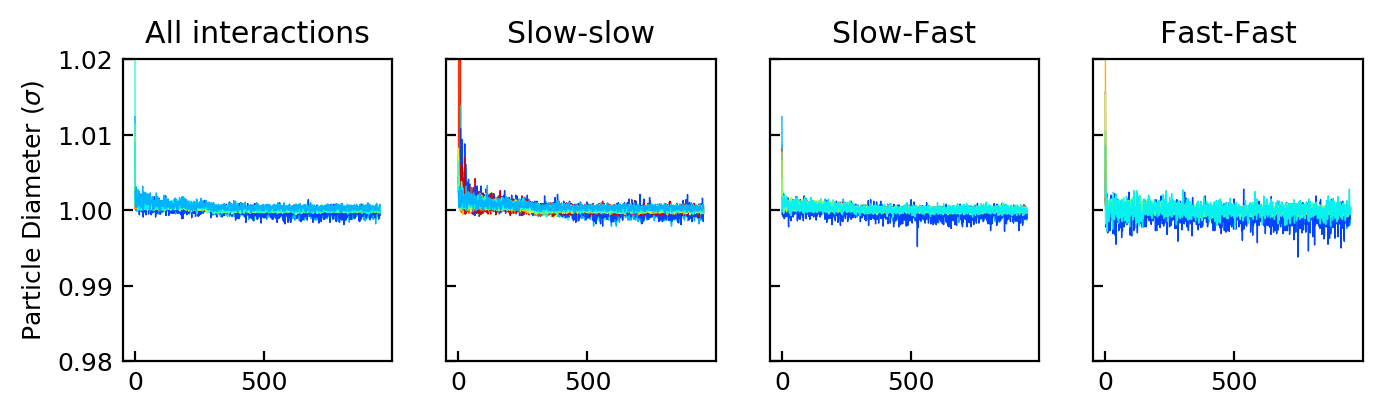

In [28]:
# Make sure I haven't messed up my data
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))
plotEps = []
for i in xrange(nFiles):
    if epsilons[i] >= 10:
        plotEps.append(epsilons[i])
    else:
        print(Files[i])
print(np.sort(plotEps))
for i in xrange(nFiles):
    if epsilons[i] in plotEps:
        xvals = np.arange(0, len(sims[i]['Timestep']))
        ax[0].plot(xvals, sims[i]['sigALL'], c=plt.cm.jet(epsilons[i]/max(epsilons)), label=epsilons[i])
        ax[1].plot(xvals, sims[i]['sigAA'], c=plt.cm.jet(epsilons[i]/max(epsilons)), label=epsilons[i])
        ax[2].plot(xvals, sims[i]['sigAB'], c=plt.cm.jet(epsilons[i]/max(epsilons)), label=epsilons[i])
        ax[3].plot(xvals, sims[i]['sigBB'], c=plt.cm.jet(epsilons[i]/max(epsilons)), label=epsilons[i])
ax[0].set_ylim(0.98, 1.02)
ax[0].set_ylabel(r'Particle Diameter $(\sigma)$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
# plt.legend(title=r'$\epsilon$', loc = 4, bbox_to_anchor=(1.65, 0.34))
plt.show()

# These show the mode particle diameter over time for:
#  Row 1: use of distinct epsilon
#  Row 2: use of equal epsilon (decided by faster particle)
# (different colors denote different strengths of the repulsion ratio)

In [ ]:
# Figure out how what we should use for steady-state
numFiles = len(txtFiles)
# We should average past a specific time, not an index number...
ssStartTime = 25.0
ssStartInd = []
badFiles = []
# Get indices for files which aren't at steady-state
for i in xrange(numFiles):
    if all_sims[i]['Timestep'].iloc[-1] / params['brownTime'][i] >= ssStartTime:
        for j in xrange(len(all_sims[i]['Timestep'])):
            if all_sims[i]['Timestep'][j] / params['brownTime'][i] >= ssStartTime:
                ssStartInd.append(j)
                break
    else:
        badFiles.append(i)

# Delete rows of dataframe
# Remove these indices from: txtFiles, all_sims, params
print("Number of textfiles before delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes before delete: {}").format(len(all_sims))
print("Params rows before delete: {}").format(len(params['partAll']))
if badFiles:
    # You have to reverse the order so that you don't mess up your indexing
    for myindex in sorted(badFiles, reverse=True):
        del txtFiles[myindex]
        del all_sims[myindex]
        params.drop(params.index[myindex], inplace=True)  
print("Number of textfiles after delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes after delete: {}").format(len(all_sims))
print("Params rows after delete: {}").format(len(params['partAll']))

# You have to reindex the dataframe
params.index = range(len(params['partAll']))
numFiles = len(txtFiles)

# Visual check to see if this is the appropriate time window for steady-state
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][ssStartInd[i]:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][ssStartInd[i]:-1] / params['partA'][i] * 100.0,
             c='k')
plt.show()

In [ ]:
# Get lists for distinct values that I might want to plot
distPeR = []
for i in xrange(numFiles):
    if params['peR'][i] not in distPeR:
        distPeR.append(params['peR'][i])
singleSort(distPeR)
print(distPeR)

distxA = []
for i in xrange(numFiles):
    if params['xA'][i] not in distxA:
        distxA.append(params['xA'][i])
singleSort(distxA)
print(distxA)

In [ ]:
# Now get time-based steady state values

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
var = pd.DataFrame(columns=headers)
# Initialize dataframes
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)
    var.loc[i] = [0] * len(headers)
    
# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(all_sims[i].iloc[1])):
        # Compute mean of data after steady-state time (25tb) in jth column of ith file
        avg = np.mean(all_sims[i].iloc[ssStartInd[i]:-1, j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation and variance in this data
        stdError = np.std(all_sims[i].iloc[ssStartInd[i]:-1, j])
        stdErr[headers[j-1]][i] = stdError
        var[headers[j-1]][i] = stdError ** 2
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]
        SS['Lc_numA'][i] /= params['partA'][i]
        # Now my standard error is a percentage
        stdErr['Gas_A'][i] /= params['partA'][i]
        stdErr['Dense_A'][i] /= params['partA'][i]
        stdErr['Lc_numA'][i] /= params['partA'][i]
        var['Gas_A'][i] /= params['partA'][i]
        var['Dense_A'][i] /= params['partA'][i]
        var['Lc_numA'][i] /= params['partA'][i]
        
    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]
        SS['Lc_numB'][i] /= params['partB'][i]
        stdErr['Gas_B'][i] /= params['partB'][i]
        stdErr['Dense_B'][i] /= params['partB'][i]
        stdErr['Lc_numB'][i] /= params['partB'][i]
        var['Gas_B'][i] /= params['partB'][i]
        var['Dense_B'][i] /= params['partB'][i]
        var['Lc_numB'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]
stdErr['Gas_tot'][:] /= params['partAll'][:]
stdErr['Dense_tot'][:] /= params['partAll'][:] 
stdErr['Lg_clust'][:] /= params['partAll'][:] 
stdErr['MCS'][:] /= params['partAll'][:]
var['Gas_tot'][:] /= params['partAll'][:]
var['Dense_tot'][:] /= params['partAll'][:] 
var['Lg_clust'][:] /= params['partAll'][:] 
var['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lc_numA'][:] *= 100.0
SS['Lc_numB'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
stdErr['Gas_A'][:] *= 100.0
stdErr['Gas_B'][:] *= 100.0
stdErr['Gas_tot'][:] *= 100.0
stdErr['Dense_A'][:] *= 100.0
stdErr['Dense_B'][:] *= 100.0
stdErr['Dense_tot'][:] *= 100.0
stdErr['Lc_numA'][:] *= 100.0
stdErr['Lc_numB'][:] *= 100.0
stdErr['Lg_clust'][:] *= 100.0
stdErr['MCS'][:] *= 100.0
var['Gas_A'][:] *= 100.0
var['Gas_B'][:] *= 100.0
var['Gas_tot'][:] *= 100.0
var['Dense_A'][:] *= 100.0
var['Dense_B'][:] *= 100.0
var['Dense_tot'][:] *= 100.0
var['Lc_numA'][:] *= 100.0
var['Lc_numB'][:] *= 100.0
var['Lg_clust'][:] *= 100.0
var['MCS'][:] *= 100.0
pd.set_option('display.max_rows', 2)
display(SS)
display(stdErr)
display(var)